In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Resources'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [7]:
data = pd.read_csv("Resources/data.csv")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
y= data['diagnosis'].map({'M':0,'B':1})

In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [10]:
x= data.drop(columns=['id','diagnosis','Unnamed: 32'])

In [11]:
x


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
import tensorflow as tf

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Applying train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33)
N ,D =X_train.shape

In [15]:
# Scalling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
### Now creating the model

model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [21]:
# Compiling the model

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [30]:
#You can avoid this error by converting your labels to arrays before calling model.fit()
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [31]:
r= model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 2ms/sample - loss: 1.1170 - accuracy: 0.2231 - val_loss: 1.0563 - val_accuracy: 0.2181
Epoch 2/100
381/381 [==============================] - 0s 200us/sample - loss: 1.0146 - accuracy: 0.2572 - val_loss: 0.9553 - val_accuracy: 0.2766
Epoch 3/100
381/381 [==============================] - 0s 159us/sample - loss: 0.9175 - accuracy: 0.2966 - val_loss: 0.8679 - val_accuracy: 0.3245
Epoch 4/100
381/381 [==============================] - 0s 157us/sample - loss: 0.8355 - accuracy: 0.3911 - val_loss: 0.7888 - val_accuracy: 0.4362
Epoch 5/100
381/381 [==============================] - 0s 183us/sample - loss: 0.7621 - accuracy: 0.4777 - val_loss: 0.7201 - val_accuracy: 0.5266
Epoch 6/100
381/381 [==============================] - 0s 155us/sample - loss: 0.6973 - accuracy: 0.5669 - val_loss: 0.6623 - val_accuracy: 0.5851
Epoch 7/100
381/381 [==============================] - 0s 157us/sample - l

381/381 [==============================] - 0s 151us/sample - loss: 0.1514 - accuracy: 0.9606 - val_loss: 0.1675 - val_accuracy: 0.9362
Epoch 57/100
381/381 [==============================] - 0s 144us/sample - loss: 0.1495 - accuracy: 0.9606 - val_loss: 0.1660 - val_accuracy: 0.9362
Epoch 58/100
381/381 [==============================] - 0s 148us/sample - loss: 0.1476 - accuracy: 0.9606 - val_loss: 0.1644 - val_accuracy: 0.9415
Epoch 59/100
381/381 [==============================] - 0s 140us/sample - loss: 0.1458 - accuracy: 0.9606 - val_loss: 0.1630 - val_accuracy: 0.9415
Epoch 60/100
381/381 [==============================] - 0s 160us/sample - loss: 0.1440 - accuracy: 0.9606 - val_loss: 0.1616 - val_accuracy: 0.9415
Epoch 61/100
381/381 [==============================] - 0s 157us/sample - loss: 0.1423 - accuracy: 0.9606 - val_loss: 0.1602 - val_accuracy: 0.9415
Epoch 62/100
381/381 [==============================] - 0s 144us/sample - loss: 0.1407 - accuracy: 0.9606 - val_loss: 0.1589 

In [32]:
# train and test score
print("Train score",model.evaluate(X_train,Y_train))
print("Test score",model.evaluate(X_test,Y_test))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train score [0.10071514638781234, 0.97637796]
188/1 [===================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

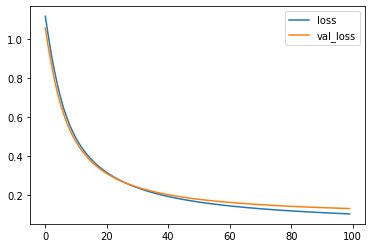

In [33]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [34]:
x=scaler.fit_transform(x)
cl = pd.DataFrame(model.predict_classes(x),columns=['class'])

In [35]:
data['class']=cl

In [36]:
pd.DataFrame([data['id'],data['class']]).T.to_csv('Submit.csv',index=False)